In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os
from scipy.optimize import curve_fit
import B00_codes.dataReader as dr

NO_MS_EQUALS_1 = 0
Q_FINAL = 1
THREE_PI_HALF_FINAL = 2
REF_MINUS_SIG  =3

# Conventional readout

In [ ]:
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-09-03/'
for dataFolder in os.listdir(mainFolder):
    # print(dataFolder)
    if 'T2E_' in dataFolder:
        idx = int(dataFolder[1:4])
        if idx > 3:
            datafile = mainFolder + dataFolder +'/T2EObject_sig_set.dat'
            sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1)

[ 9.14683000e-02  6.00814222e+01  2.30000000e+00 -1.70522368e-40]


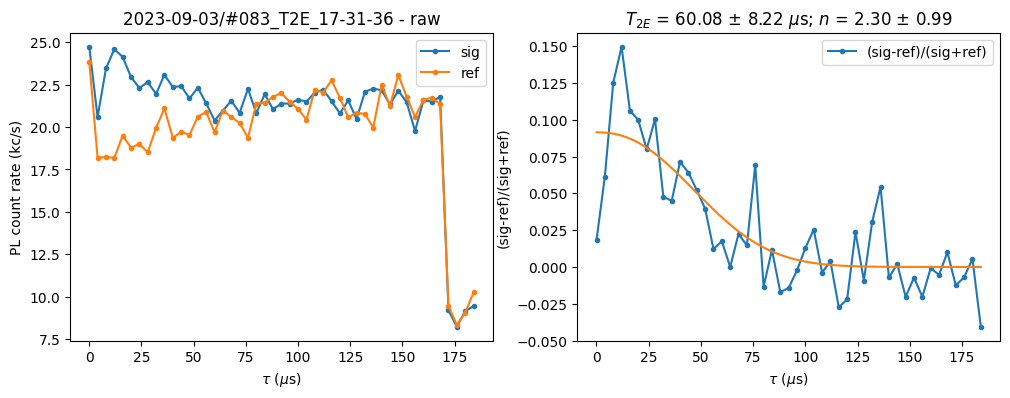

[ 9.21582767e-02  4.84060348e+01  4.00999999e+00 -2.84770110e-38]


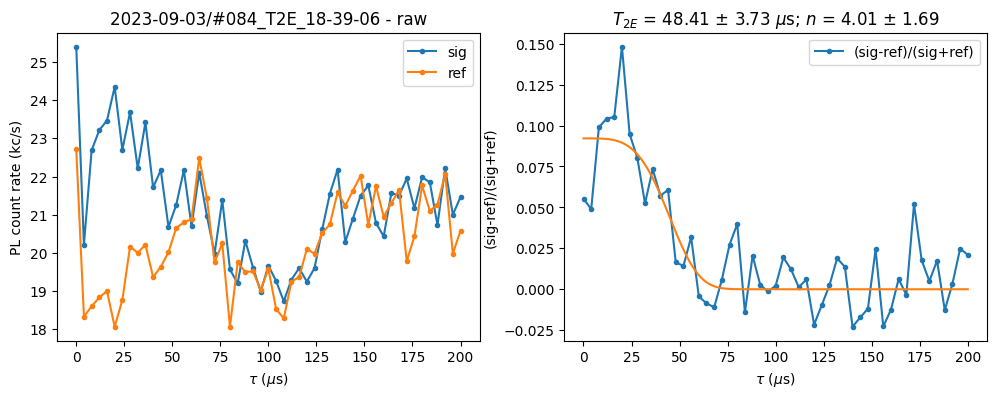

In [5]:
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-09-03/'
for dataFolder in os.listdir(mainFolder):
    # print(dataFolder)
    if 'T2E_' in dataFolder:
        idx = int(dataFolder[1:4])
        if idx > 0 and idx < 100:
            datafile = mainFolder + dataFolder +'/T2EObject_sig_set.dat'
            guess = (0.15, 110, 4, -1)
            ngood=2.3; cgood=0
            lowerBounds = (0,      0,      ngood, -1)    #(0,      0,      3.8,  -1)
            upperBounds = (np.inf, np.inf, 4.01,  cgood)  #(np.inf, np.inf, 4.01, -0.010)
            sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1, 
                                   ifFit=1, guess=guess, upperBounds=upperBounds, lowerBounds=lowerBounds)

2.3 0.0


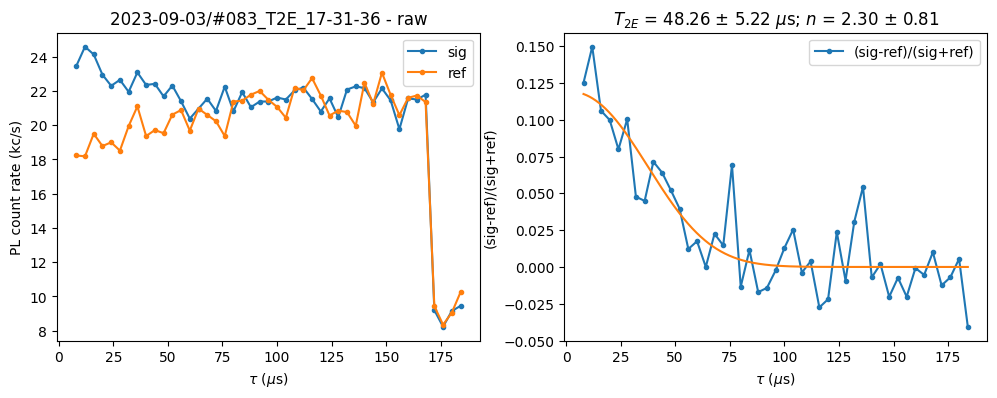

2.0 0.009999999999999998


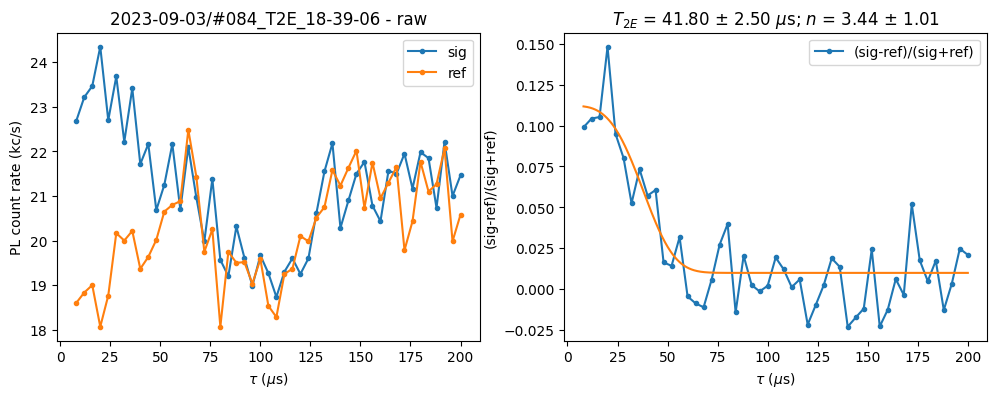

In [4]:
startDataPoint=2
days = ["3"]
mainFolders = []
for day in days:
    mainFolders.append('C:/Users/lukin2dmaterials/data/2023-09-'+ str(int(day)).zfill(2) +"/")
t2arr = []; t2errarr = []; narr = []; nerrarr = []
for mainFolder in mainFolders:
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'T2E_' in dataFolder:
            idx = int(dataFolder[1:4])
            
            if idx >= 1:
                ifFit = 1
                datafile = mainFolder + dataFolder +'/T2EObject_sig_set.dat'
                guess = (0.15, 110, 4, -1)
                ntry = np.linspace(2, 4, 21); ctry = np.linspace(-0.02,0.04,7)
                perrs = np.zeros((len(ntry), len(ctry)))
                for i, nlow in enumerate(ntry):
                    for j, chigh in enumerate(ctry):
                        lowerBounds = (0,      0,      nlow, -1)    #(0,      0,      3.8,  -1)
                        upperBounds = (np.inf, np.inf, 4.01, chigh)  #(np.inf, np.inf, 4.01, -0.010)
                        sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1, endDataPoint=None, 
                                                        ifPlot=False, ifPrint=False,
                                            guess=guess, ifFit=ifFit, upperBounds=upperBounds, lowerBounds=lowerBounds)
                        perrs[i,j] = np.round(perr[1]/popt[1] + perr[2]/popt[2],3) # minimum relerr of T2 and n
                        
                indices = np.unravel_index(np.argmin(perrs), perrs.shape)
                ngood = ntry[indices[0]]; cgood = ctry[indices[1]]
                print(ngood, cgood)

                lowerBounds = (0,      0,      ngood, -1)    #(0,      0,      3.8,  -1)
                upperBounds = (np.inf, np.inf, 4.01,  cgood)  #(np.inf, np.inf, 4.01, -0.010)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1, endDataPoint=None, 
                                    ifPlot=True, ifPrint=False, startDataPoint=startDataPoint,
                                    guess=guess, ifFit=ifFit, upperBounds=upperBounds, lowerBounds=lowerBounds)
                n = 40
                if len(sig) < n: 
                    print("Bad data: " + datafile)
                else:
                    t2arr.append(popt[1]); narr.append(popt[2]); t2errarr.append(perr[1]); nerrarr.append(perr[2])

t2arr = np.array(t2arr); t2errarr = np.array(t2errarr); narr = np.array(narr); nerrarr = np.array(nerrarr)
iters = np.arange(len(t2arr))

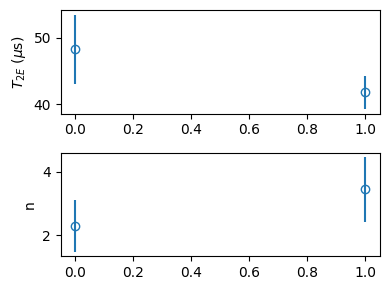

In [6]:
fig, axs = plt.subplots(2,1, figsize=(4,3))
axs[0].errorbar(iters, t2arr,t2errarr, linestyle='', marker='o', markerfacecolor='none')
axs[0].set_ylabel("$T_{2E}$ ($\mu$s)")
# axs[0].axvline(x=4.5, ymin=0, ymax=1, color='red', linewidth=1)
# axs[0].axvline(x=9.5, ymin=0, ymax=1, color='red', linewidth=1)

axs[1].errorbar(iters, narr, nerrarr, linestyle='', marker='o', markerfacecolor='none')
# axs[1].axvline(x=4.5, ymin=0, ymax=1, color='red', linewidth=1)
# axs[1].axvline(x=9.5, ymin=0, ymax=1, color='red', linewidth=1)
axs[1].set_ylabel("n");

plt.tight_layout()

# T2ESCC

In [134]:
# Repeat measuring T2E SCC
days = np.linspace(5,5,1)
# wanted_idx = 94
dataArr = []; gArr = []; err_gArr = []; sigs = None; refs = None
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-09-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'T2ESCC' in dataFolder:
            idx = int(dataFolder[1:4])
            if (idx>=7 and idx <=7):
                finalDataFolder = mainFolder + dataFolder
                datafile = finalDataFolder +'/T2ESCCObject_sig_set.dat'
                power589 = 14.4; power532 = 110; power635 = 30
                t532 = 30e3; delay1 = 5e3; tsh = 120; delay3 = 600; ti=80; delay4 = 0.5e6; tr_ns = 1e6

                sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
                                    datafile, num_of_bins=50, binwidth=1, plot_hist_every=100, ifPlot=False,
                                    ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=False,)
                if sigs is None: sigs = sig
                else: sigs = np.concatenate((sigs, sig),axis=1)
                if refs is None: refs = ref
                else: refs = np.concatenate((refs, ref),axis=1)
print(np.shape(sigs))
# taus = np.linspace(20,200020,51)
# taus = np.round(np.logspace(np.log10(10),np.log10(50e3),51),0)*4
taus = np.linspace(20,120020,41)
sigavg = np.average(sigs,axis=1); refavg = np.average(refs,axis=1)
                

(41, 10000)


In [135]:
startIdx = 0
sigs = sigs[startIdx:]
refs = refs[startIdx:]
taus = taus[startIdx:]
print(np.shape(sigs))

(41, 10000)


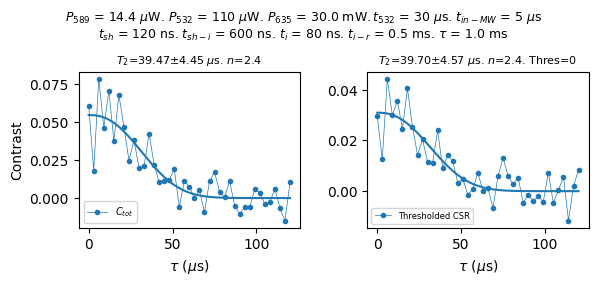

[2.4000000000000012, 2.4000062891697684]


In [136]:
guess = (0.15,40e3,4,-0.05)
lowerBounds = (0, 0,0.5,-1)
upperBounds = (np.inf,np.inf,4,1)
t2s, t2s_err, n2s, n2s_err = dr.plotT2ESimple(taus, sigs, refs, xscale='linear',guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds,
                thresmax=3, power589=power589, power532=power532, power635=power635,
                t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns)
# t2s, t2s_err, n2s, n2s_err = dr.plotT2ESimple(taus, sig, ref, xscale='log',guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds,
#                 thresmax=3, power589=power589, power532=power532, power635=power635,
#                 t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns)
print(n2s)

In [7]:
np.round(np.logspace(np.log10(10),np.log10(50e3),51),0)*4

array([4.00000e+01, 4.80000e+01, 5.60000e+01, 6.80000e+01, 8.00000e+01,
       9.20000e+01, 1.12000e+02, 1.32000e+02, 1.56000e+02, 1.84000e+02,
       2.20000e+02, 2.60000e+02, 3.08000e+02, 3.68000e+02, 4.36000e+02,
       5.16000e+02, 6.12000e+02, 7.24000e+02, 8.60000e+02, 1.01600e+03,
       1.20800e+03, 1.43200e+03, 1.69600e+03, 2.01200e+03, 2.38400e+03,
       2.82800e+03, 3.35200e+03, 3.97600e+03, 4.71600e+03, 5.59200e+03,
       6.62800e+03, 7.86000e+03, 9.32000e+03, 1.10520e+04, 1.31040e+04,
       1.55360e+04, 1.84200e+04, 2.18440e+04, 2.59000e+04, 3.07080e+04,
       3.64120e+04, 4.31720e+04, 5.11920e+04, 6.06960e+04, 7.19720e+04,
       8.53360e+04, 1.01184e+05, 1.19976e+05, 1.42256e+05, 1.68676e+05,
       2.00000e+05])

In [101]:
np.linspace(20,120020,41)

array([2.0000e+01, 3.0200e+03, 6.0200e+03, 9.0200e+03, 1.2020e+04,
       1.5020e+04, 1.8020e+04, 2.1020e+04, 2.4020e+04, 2.7020e+04,
       3.0020e+04, 3.3020e+04, 3.6020e+04, 3.9020e+04, 4.2020e+04,
       4.5020e+04, 4.8020e+04, 5.1020e+04, 5.4020e+04, 5.7020e+04,
       6.0020e+04, 6.3020e+04, 6.6020e+04, 6.9020e+04, 7.2020e+04,
       7.5020e+04, 7.8020e+04, 8.1020e+04, 8.4020e+04, 8.7020e+04,
       9.0020e+04, 9.3020e+04, 9.6020e+04, 9.9020e+04, 1.0202e+05,
       1.0502e+05, 1.0802e+05, 1.1102e+05, 1.1402e+05, 1.1702e+05,
       1.2002e+05])

In [154]:
# Repeat plotting analysis of T2ESCC sweeping tMW-sh
days = np.linspace(5,5,1)
T2Ess = None; T2Es_errs = None
taus = np.linspace(20,120020,41)

i=0
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-09-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if 'T2ESCC' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 7 and idx <= 61:
                finalDataFolder = mainFolder + dataFolder
                datafile = finalDataFolder +'/T2ESCCObject_sig_set.dat'
                power589 = 14; power532 = 110; power635 = 30
                t532 = 30e3; delay1 = 5e3; tsh = 120; delay3 = 600; ti=100; delay4 = 0.5e6; tr_ns = 1e6
                ifPlot = 0

                sig, ref, hist2DArray_sig, hist2DArray_ref, xplot, yplot, bins1DArray = dr.readDataFullData(
                                    datafile, num_of_bins=50, binwidth=1, plot_hist_every=100, ifPlot=False,
                                    ifDataSavedAsCountRate=False, ifLogColor=True, ifSubtractRef=False, ifPlotRef=False,)
                sigavg = np.average(sig,axis=1); refavg = np.average(ref,axis=1)
                ifPlot=0

                guess = (0.15,40e3,4,-0.05)
                lowerBounds = (0, 0,0.5,-1)
                upperBounds = (np.inf,np.inf,4,1)
                T2Es, T2Es_err, n2s, n2s_err = dr.plotT2ESimple(taus, sig, ref, xscale='linear',guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds,
                    thresmax=3, power589=power589, power532=power532, power635=power635,
                    t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns, ifPlot=ifPlot)
                
                # T2Es, T2Es_err = dr.plotT2ESimple(tMWshs, sig, ref, thresmax=2, power589=power589, power532=power532, power635=power635,
                #         t532=t532, delay1=delay1, tsh=tsh, delay3=delay3, ti=ti, delay4=delay4, tr_ns=tr_ns,ifPlot=ifPlot)
                
                if T2Ess is None: T2Ess = T2Es
                else: T2Ess = np.concatenate((T2Ess, T2Es))
                if T2Es_errs is None: T2Es_errs = T2Es_err
                else: T2Es_errs = np.concatenate((T2Es_errs, T2Es_err))
                i=i+1
T2Ess     = T2Ess.reshape(i, len(T2Es))
T2Es_errs = T2Es_errs.reshape(i, len(T2Es))

In [153]:
np.shape(T2Ess)

(45, 2)

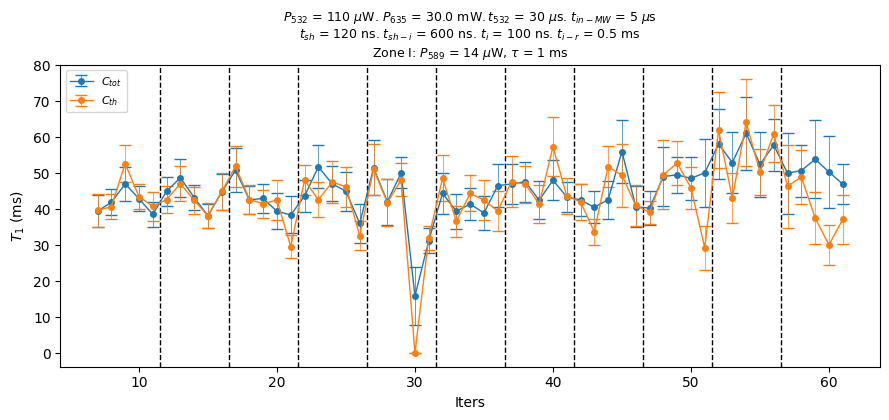

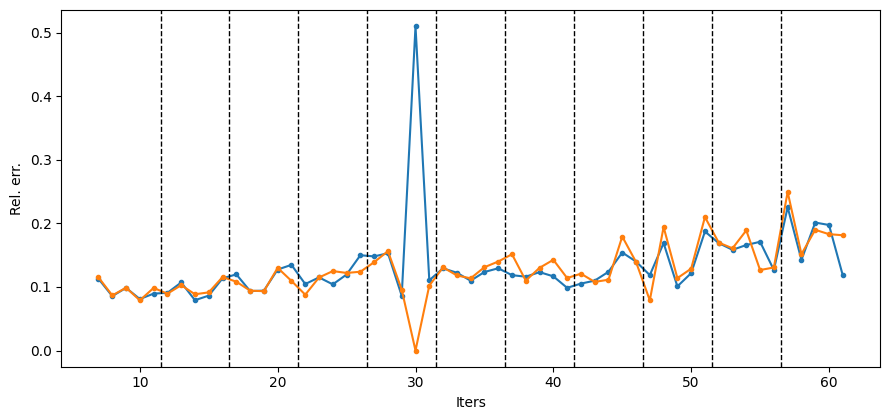

In [155]:
fig, ax = plt.subplots(figsize=(9,4.3))
x = np.arange(i)+7

ax.errorbar(x, T2Ess[:,0], T2Es_errs[:,0], label="$C_{tot}$", markersize=4, linewidth=1, elinewidth=0.5, fmt='o-', capsize=4)
ax.errorbar(x, T2Ess[:,1], T2Es_errs[:,1], label="$C_{th}$", markersize=4, linewidth=1, elinewidth=0.5, fmt='o-', capsize=4)
ax.legend(fontsize=8, loc='upper left')
ax.set_xlabel("Iters")
ax.set_ylabel("$T_1$ (ms)")

for i in range(10):
    plt.axvline(x=11.5+5*i, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=34.5, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=46.5, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=54.5, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=63.5, linestyle='--', linewidth=0.3,color='k')
# plt.axvline(x=111.5, linestyle='--', linewidth=0.3,color='k')

s1 = "$P_{532}$ = %.0f $\mu$W. $P_{635}$ = %.1f mW$. t_{532}$ = %.0f $\mu$s. $t_{in-MW}$ = %.0f $\mu$s" % (power532, power635, t532/1e3, delay1/1e3)
s2 = r"$t_{sh}$ = %.0f ns. $t_{sh-i}$ = %.0f ns. $t_{i}$ = %.0f ns. $t_{i-r}$ = %.1f ms" % (tsh, delay3, ti, delay4/1e6)
s3 = "Zone I: $P_{589}$ = 14 $\mu$W, $\\tau$ = 1 ms"
# s4 = "Zone IV: $P_{589}$=5.7 $\mu$W, $\\tau$=1.2 ms. Zone IV: $P_{589}$=9.5 $\mu$W, $\\tau$=1 ms"
ax.set_title(s1  +  "\n" + s2 + "\n" + s3, fontsize=9);
plt.tight_layout()

fig, ax = plt.subplots(figsize=(9,4.3))
ax.plot(x, T2Es_errs[:,0]/T2Ess[:,0], 'o-',markersize=3)
ax.plot(x, T2Es_errs[:,1]/T2Ess[:,1], 'o-',markersize=3)
ax.set_xlabel("Iters")
ax.set_ylabel("Rel. err.")
for i in range(10):
    plt.axvline(x=11.5+5*i, linestyle='--', linewidth=1,color='k')
# plt.axhline(y=0.25, linestyle='--', linewidth=1,color='k')
# plt.axvline(x=69.5, linestyle='--', linewidth=1,color='k')

plt.tight_layout()
plt.show()